In [13]:
# import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# pilih range tanggal
start_date = '2021-01-01'
end_date = '2023-11-20'


In [15]:
# load dataset harga sayur
df = pd.read_csv('../data/data-mentah.csv', sep=";")
df.head(10)

,id,Tgl,Kab/Kota,Tingkat Harga,BMB,BMK,BPI,BPL,BNC,CMB,...,CRH,CRM,KBK,KTG,KLB,KLG,MTM,TMT,WRT,CHB
0,23,04 Januari 2021,Wonosobo,Harga Produsen,0,17000,0,13000,0,0,...,35000,57000,0,9000,0,7000,0,4000,7000,NaN
1,70,05 Januari 2021,Wonosobo,Harga Produsen,0,17000,0,13000,0,0,...,35000,65000,0,9000,0,7000,0,4000,7000,0.0
2,108,06 Januari 2021,Wonosobo,Harga Produsen,0,17000,0,13000,0,0,...,35000,65000,0,9000,0,7000,0,4000,7000,NaN
3,135,07 Januari 2021,Wonosobo,Harga Produsen,0,17000,0,13000,0,0,...,35000,65000,0,9000,0,7000,0,5000,7000,NaN
4,253,08 Januari 2021,Wonosobo,Harga Produsen,0,17000,0,13000,0,0,...,35000,65000,0,9000,0,7000,0,4000,7000,NaN
5,259,11 Januari 2021,Wonosobo,Harga Produsen,0,17000,0,13000,0,0,...,35000,65000,0,9000,0,7000,0,4000,7000,NaN
6,287,12 Januari 2021,Wonosobo,Harga Produsen,0,17000,0,13000,0,0,...,35000,56000,0,9000,0,8000,0,3000,7000,NaN
7,326,13 Januari 2021,Wonosobo,Harga Produsen,0,17000,0,13000,0,0,...,40000,60000,0,9000,0,8000,0,2500,7000,NaN
8,425,15 Januari 2021,Wonosobo,Harga Produsen,0,17000,0,13000,0,0,...,45000,60000,0,9000,0,6000,0,2500,7000,NaN
9,427,14 Januari 2021,Wonosobo,Harga Produsen,0,17000,0,13000,0,0,...,40000,60000,0,9000,0,8000,0,2500,7000,NaN


In [16]:
pick_harga = 'KTG'

# Filter colom (Tanggal (TGL) dan harga (KTG) )
df = df[['Tgl', pick_harga]]
df.rename(columns={'Tgl': 'tanggal', pick_harga: 'harga'}, inplace=True)
print(df.shape)
df.info()



(818, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tanggal  818 non-null    object
 1   harga    818 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.9+ KB


In [18]:
# mengubah format tanggal karene belum dapat dijadikan tipe data datetime 
def change_bulan(x):
    # return x[3:-5]
    if x[3:-5] == "Januari":
      return f"{x[-4:]}-0{1}-{x[:2]}"
    elif x[3:-5] == "Februari":
        return f"{x[-4:]}-0{2}-{x[:2]}"
    elif x[3:-5] == "Maret":
        return f"{x[-4:]}-0{3}-{x[:2]}"
    elif x[3:-5] == "April":
        return f"{x[-4:]}-0{4}-{x[:2]}"
    elif x[3:-5] == "Mei":
        return f"{x[-4:]}-0{5}-{x[:2]}"
    elif x[3:-5] == "Juni":
        return f"{x[-4:]}-0{6}-{x[:2]}"
    elif x[3:-5] == "Juli":
        return f"{x[-4:]}-0{7}-{x[:2]}"
    elif x[3:-5] == "Agustus":
        return f"{x[-4:]}-0{8}-{x[:2]}"
    elif x[3:-5] == "September":
        return f"{x[-4:]}-0{9}-{x[:2]}"
    elif x[3:-5] == "Oktober":
        return f"{x[-4:]}-{10}-{x[:2]}"
    elif x[3:-5] == "November":
        return f"{x[-4:]}-{11}-{x[:2]}"
    elif x[3:-5] == "Desember":
        return f"{x[-4:]}-{12}-{x[:2]}"

df['tanggal'] = df['tanggal'].apply(change_bulan)

Selanjutnya melakukan perbaikan data yang kosong dan memberi nilai dengan metode moving average 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  1080 non-null   datetime64[ns]
 1   bulan    1080 non-null   int32         
 2   tahun    1080 non-null   int32         
 3   harga    799 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 25.4 KB


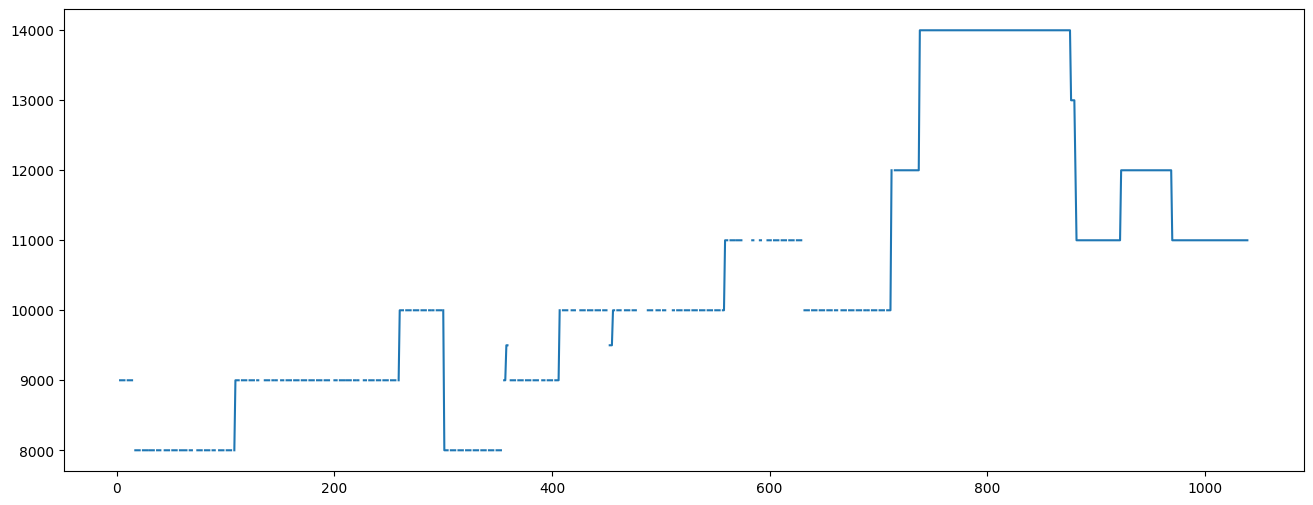

In [20]:
def new_date(tahun):
    tanggal = []

    for i in range(len(tahun)):
        for j in range(12):
            
            tanggal_baru = [d for d in pd.date_range(start=f'{tahun[i]}-{j+1}-01', periods=30, freq='D')]

            for k in range(len(tanggal_baru)):
                tanggal.append(tanggal_baru[k])

    return tanggal

tahun = [2021, 2022, 2023]
tanggal = new_date(tahun)

df_lengkap = pd.DataFrame({'tanggal': tanggal})
df_lengkap['bulan'] = df_lengkap['tanggal'].dt.month
df_lengkap['tahun'] = df_lengkap['tanggal'].dt.year

df = pd.merge(df_lengkap, df, how='left', on=['tanggal', 'bulan', 'tahun'])
# plot data mentah
# df.index = df['tanggal']
df['harga'].plot(figsize=(16,6))
df.info()

In [8]:

# Mengisi nilai yang kosong dengan nilai moving average , 
# kemudian hapus data yang tidak terisi nilai
df['harga'].fillna(df['harga']
                   .rolling(30,center=True,min_periods=1)
                   .median(), inplace=True)
df.loc[df.harga == 0, 'harga'] = df['harga'].rolling(
    30,
    center=True,
    min_periods=1).median()
df.dropna(inplace=True)
df.sample(10)

,tanggal,bulan,tahun,harga
105,2021-04-16,4,2021,8000.0
491,2022-05-12,5,2022,10000.0
872,2023-06-03,6,2023,14000.0
567,2022-07-28,7,2022,11000.0
889,2023-06-20,6,2023,11000.0
578,2022-08-09,8,2022,11000.0
352,2021-12-23,12,2021,8000.0
58,2021-03-01,3,2021,8000.0
297,2021-10-28,10,2021,10000.0
489,2022-05-10,5,2022,10000.0


In [9]:
# set tanggal menjadi index
df.index = df['tanggal']
# pilih range tanggal
df = df.loc[(df['tanggal'] 
             >= start_date) 
             & (df['tanggal'] <= end_date)]

df = df[['harga']]
df

,harga
tanggal,
2021-01-01,9000.0
2021-01-02,9000.0
2021-01-03,9000.0
2021-01-04,9000.0
2021-01-05,9000.0
...,...
2023-11-16,11000.0
2023-11-17,11000.0
2023-11-18,11000.0


In [10]:

# export csv data hasil preprocessing 
df.to_csv(f"../data/timeseries-{pick_harga}-wonosobo.csv")

<Axes: xlabel='tanggal'>

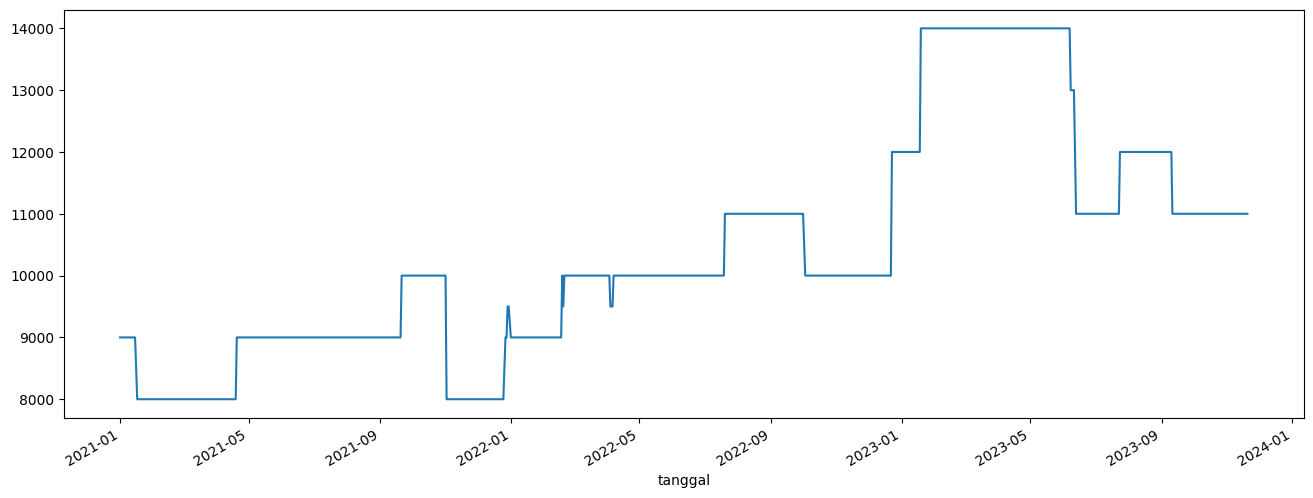

In [11]:

# plot data hasil preprocessing
df['harga'].plot(figsize=(16,6))
